In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('heights.csv')
data

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

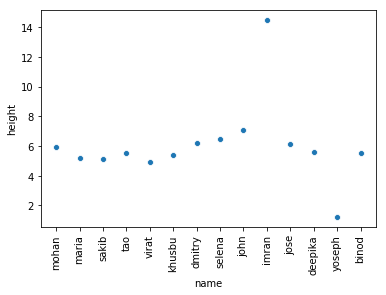

In [10]:
sns.scatterplot(data['name'],data['height'])
plt.xticks(rotation=90)

In [59]:
max_threshold=data['height'].quantile(0.95)

In [60]:
data[data['height']>max_threshold]

,name,height
9,imran,14.5


In [70]:
min_threshold=data['height'].quantile(0.05)
min_threshold

3.6050000000000004

In [97]:
data[data['height']<min_threshold]

,name,height
12,yoseph,1.2


In [96]:
data.describe()

,height
count,14.000000
mean,6.050000
std,2.779804
min,1.200000
25%,5.250000
50%,5.550000
75%,6.175000
max,14.500000


In [102]:
data=data[(data['height']<max_threshold) & (data['height']>min_threshold)]

In [103]:
data

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


In [105]:
data=pd.read_csv('bhp.csv')
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [110]:
data.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

In [111]:
data.shape

(13200, 7)

In [107]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [121]:
min_threshold,max_threshold=data['price_per_sqft'].quantile([0.001,0.999])
min_threshold,max_threshold

(1366.184, 50959.36200000099)

In [132]:
data[(data['price_per_sqft']<max_threshold) & (data['price_per_sqft']>min_threshold)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [2]:
data=pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
min_threshold=data['price'].quantile(0.01)

In [5]:
max_threshold=data['price'].quantile(0.999)

In [6]:
min_threshold,max_threshold

(30.0, 3000.0)

In [7]:
data[(data['price']<max_threshold) & (data['price']>min_threshold)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [8]:
data.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4864,3468914,Luxury One Bedroom CentralPark West,17477908,Mat,Manhattan,Upper West Side,40.79098,-73.96745,Entire home/apt,264,30,6,2018-05-24,0.10,10,281
23512,19035295,Cozy Apartment in Bushwick,93356179,Morgan,Brooklyn,Bushwick,40.70674,-73.92010,Entire home/apt,121,5,3,2017-07-19,0.12,1,0
16188,13065032,"Spacious, kid-friendly apt. 15 mins from Manha...",10643230,Jacob,Queens,Sunnyside,40.74640,-73.91675,Entire home/apt,120,5,3,2018-08-20,0.08,1,0
5315,3838056,Unique stylish garden apartment,4091348,Ila,Brooklyn,Williamsburg,40.71241,-73.96530,Entire home/apt,450,4,0,NaN,NaN,1,0
11319,8795721,Spacious studio 10 min to Manhattan,6672223,Katia,Queens,Astoria,40.76196,-73.92400,Entire home/apt,72,3,7,2016-01-18,0.15,1,0
22351,18050153,Chelsea Haven--Summer Sublet,10621137,Anne Marie,Manhattan,Chelsea,40.74686,-74.00430,Entire home/apt,134,3,1,2017-08-12,0.04,1,0
34687,27511207,"One Private Bedroom - near Astoria, NY & LGA",106233552,Coco,Queens,East Elmhurst,40.76530,-73.86729,Private room,89,3,0,NaN,NaN,2,23
46617,35346075,Private room in NYC!! Walking to Central Park!!,130617332,Haley,Manhattan,Harlem,40.81144,-73.94386,Private room,85,3,0,NaN,NaN,3,244
7844,6000785,Charming 1BR Bed-Stuy Garden Apt,31150792,Micah,Brooklyn,Bushwick,40.69709,-73.93538,Entire home/apt,100,2,143,2019-05-18,3.41,1,0
42199,32760292,LUXURY APT 3 BEDROOMS MIDTOWN Views >GYM>TERRACE,245333087,Shoshana,Manhattan,Murray Hill,40.74545,-73.97188,Entire home/apt,650,5,2,2019-05-05,0.60,1,339
